# Feature Engineering

## Mutual information

- Might provide relative potetial of a feature to predict the target
- Might be useful for feature selection
- We have to be careful! It is a univariate measure, so it does not capture the interaction between features!
- The actual usefulness of a feature depends on the model we use

The mutual measure measure how much information the presence/absence of a feature contributes to predict the presence/absence of the target.
0 is the minimum and there is no maximum, but this is a logarithmic variable and values over 2 are uncommon.

We need to tell sklearn if variables are discrete or continuous. We can use the following strategies:

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [113]:
df = pd.read_csv(os.path.join("data", "Automobile_data.csv")).dropna()

discrete_variables = ['engine-size', 'normalized-losses', 'curb-weight', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
float_variables = ['wheel-base', 'length', 'width', 'height', 'bore', 'stroke', 'compression-ratio']
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [114]:
for feature in discrete_variables:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    df.dropna(subset=[feature], inplace=True)
    df[feature] = df[feature].astype(int)
    
for feature in float_variables:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    df.dropna(subset=[feature], inplace=True)
    df[feature] = df[feature].astype(float)
    
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   aspiration         160 non-null    object 
 5   num-of-doors       160 non-null    object 
 6   body-style         160 non-null    object 
 7   drive-wheels       160 non-null    object 
 8   engine-location    160 non-null    object 
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    object 
 15  num-of-cylinders   160 non-null    object 
 16  engine-size        160 non-null

In [125]:
X = df.drop(['price'], axis=1).copy()
y = df['price'].copy()

#label encoding
for colname in df.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()

#All discrete
discrete_features = X.dtypes == int

In [126]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features) # target is continuous
    #mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features) # target is discrete
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

In [127]:
mi_scores[::3]

curb-weight          1.262789
engine-size          0.877945
length               0.674263
bore                 0.489698
peak-rpm             0.397158
drive-wheels         0.275106
compression-ratio    0.136189
fuel-type            0.053230
num-of-doors         0.000000
Name: MI Scores, dtype: float64

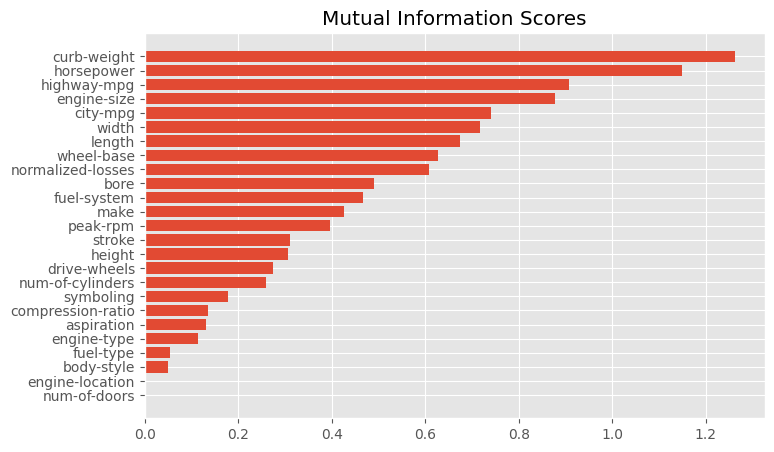

In [128]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

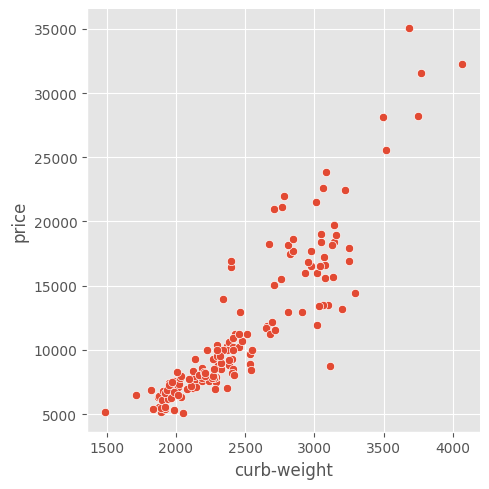

In [129]:
sns.relplot(x=df['curb-weight'], y=y, kind='scatter')

Watch out for variables that might look unseful but are actually usefull in relationship with other variables

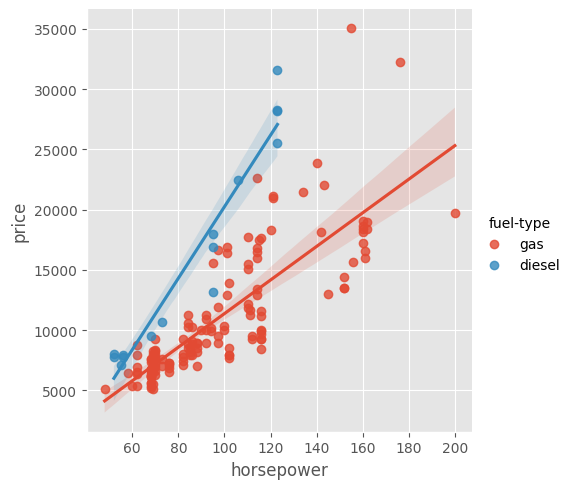

In [131]:
sns.lmplot(x='horsepower', y='price', hue="fuel-type", data=df)

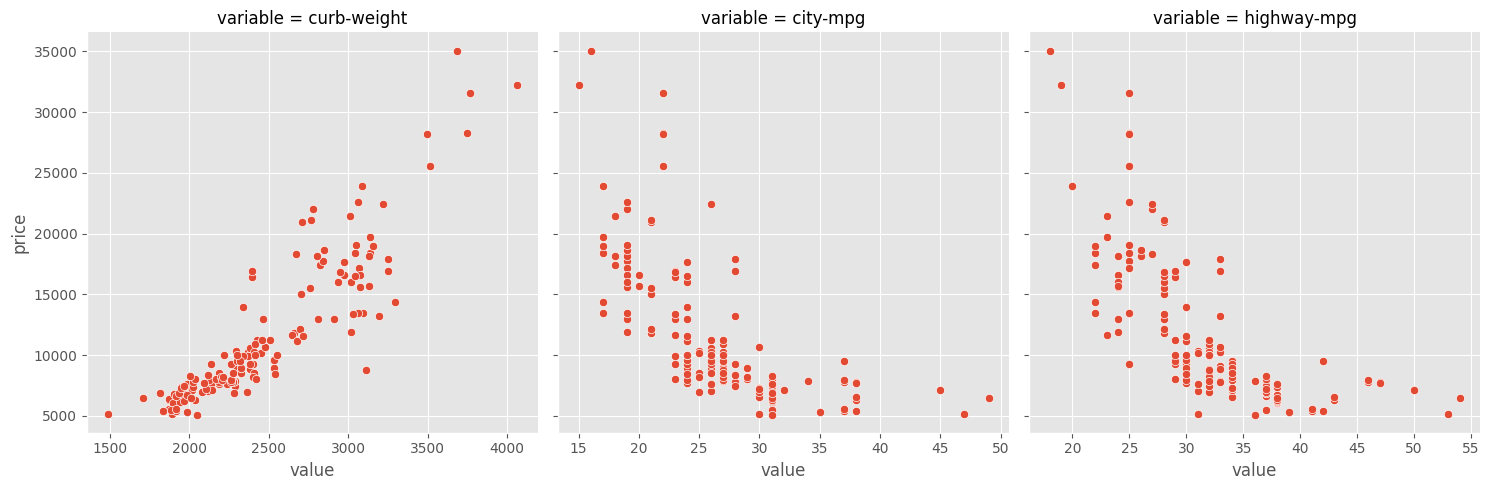

In [138]:
features = ['curb-weight', 'city-mpg', 'highway-mpg']
sns.relplot(x='value', y='price', col='variable', data=df.melt(id_vars="price", value_vars=features), facet_kws=dict(sharex=False), kind='scatter')

## Doing transformations

```python

# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)


# Counting for instance. if there was something nearby
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

````

You could also use a dataframe's built-in methods to create boolean values. In the Concrete dataset are the amounts of components in a concrete formulation. Many formulations lack one or more components (that is, the component has a value of 0). This will count how many components are in a formulation with the dataframe's built-in greater-than gt method:

```python

components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

```

You could also join simple features into a composed feature if you had reason to believe there was some interaction in the combination:

```python
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()
```

| | make | body_style | make_and_style |
| --| --| --| --|
| 0	| alfa-romero | convertible	   | alfa-romero_convertible |
| 1	| alfa-romero | convertible	   | alfa-romero_convertible |
| 2	| alfa-romero | hatchback	   | alfa-romero_hatchback |
| 3	| audi	| sedan | audi_sedan |
| 4	| audi	| sedan | audi_sedan |

### Group transforms

Handy methods: ```mean```, ```std```, ```min```, ```max```, ```sum```, ```count```, ```nunique```, ```median```, ```var```

```python	
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)
```

You could use a transform like this to create a "frequency encoding" for a categorical feature.

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

```python
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)
```


## CLustering with k-means

```python
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()
```


## Principal Component Analysis

Data that is standarized, "variation" means "correlation", meanwhile with undstandarized data, "variation" means "covariance"

It is normal to apply standarization

PCA can be used for:

- Dimensionality reduction
- Noise filtering
- Visualization
- Decorrelation
- Anomaly detection


Best Practices:

- PCA works with numerical features, like continuous or counts
- PCA is sensitive to scale.
- Consider removing or constraining outliers

## Target encoding

For categorical variables

We have to watch out sometimes categorical variables are not representative, or are missing data, or might have very few data. For instance, the case where there is only one data point from a category.

Best way to deal with this is:

### Smoothing

smoorth in category with the overall average. THe speudo code is :

```encoding = weight * in_category + (1 - weight) * overall```

weight from 0 to 1.

Easy way to calculate weight: 

```weight = n / (n + m)```

n is the total number of times that category occurs. m is the "smoothing factor". Larger values of m put more weight on the overall estimate.

The ``category_encoders`` package in ``scikit-learn-contrib`` implements an m-estimate encoder, which we'll use to encode our Zipcode feature.`

```python
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)


#COmparing
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);
```